In [1]:
from utils import *
import numpy as np
import pandas as pd
import tensorflow as tf

In [63]:
tf.enable_eager_execution()

In [16]:
ytest = np.load("channels/channel_5_ytest.npy")

In [7]:
### Specify channels to load in, in the input list (see utils.py for code)
chan_dict = load_channels([0,1,2,3,4,5,6,7,8,9])#here

In [72]:
print("-The Channels you have loaded are: ",)
print("\t",list(chan_dict.keys()))

-The Channels you have loaded are: 
	 ['channel2', 'channel4', 'channel9', 'channel1', 'channel5', 'channel8', 'channel0', 'channel6', 'channel3', 'channel7']


In [33]:
### specify models to load in
model_dict = load_models([1,2,3,4,5,6,7,8,9,0])

In [74]:
model_list = list(model_dict.keys())
print("The models you have loaded are: ")
print("\t", model_list)

The models you have loaded are: 
	 ['channel2', 'channel4', 'channel9', 'channel1', 'channel5', 'channel8', 'channel7', 'channel6', 'channel3', 'channel0']


In [68]:
### Inference for each model
from tensorflow.contrib.metrics import f1_score
loss = []
acc = []
f1 = []
for index in range(len(model_list)):
    
    print("Inference for ", model_list[index])
    model = model_dict[model_list[index]]
    opt = tf.keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    score = model.evaluate(chan_dict[model_list[index]], ytest)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    loss.append(score[0])
    acc.append(score[1])
    print()
    pred = model.predict(chan_dict[model_list[index]])
    f1.append(f1_score(ytest, pred)[0].numpy())

Inference for  channel2
236/236 [==============================] - 3s 14ms/sample - loss: 1.5946 - acc: 0.9068
Test loss: 1.5945562791016141
Test accuracy: 0.90677965

Inference for  channel4
236/236 [==============================] - 3s 13ms/sample - loss: 2.2138 - acc: 0.8983
Test loss: 2.213776362144341
Test accuracy: 0.89830506

Inference for  channel9
236/236 [==============================] - 3s 12ms/sample - loss: 0.9256 - acc: 0.9280
Test loss: 0.9255583367105258
Test accuracy: 0.9279661

Inference for  channel1
236/236 [==============================] - 3s 13ms/sample - loss: 1.9087 - acc: 0.5678
Test loss: 1.9087175918837724
Test accuracy: 0.5677966

Inference for  channel5
236/236 [==============================] - 3s 12ms/sample - loss: 0.2640 - acc: 0.9703
Test loss: 0.26396609564958995
Test accuracy: 0.970339

Inference for  channel8
236/236 [==============================] - 3s 12ms/sample - loss: 0.7986 - acc: 0.9449
Test loss: 0.7986055733793873
Test accuracy: 0.944915

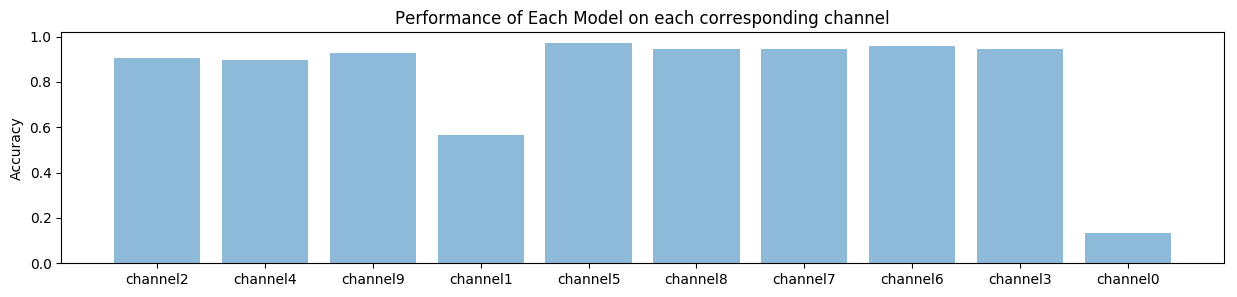

In [44]:
### Visualizations
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = tuple(model_list)
y_pos = np.arange(len(objects))
performance = acc

plt.figure(figsize=(15,3))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Performance of Each Model on each corresponding channel')

plt.show()

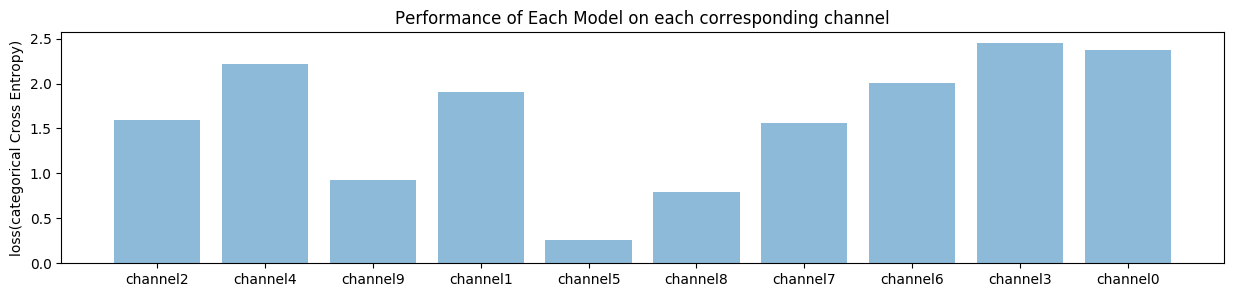

In [60]:
### Visualizations
objects = tuple(model_list)
y_pos = np.arange(len(objects))
performance = loss

plt.figure(figsize=(15,3))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('loss(categorical Cross Entropy)')
plt.title('Performance of Each Model on each corresponding channel')

plt.show()

The F1 score can be interpreted as a weighted average of the precision and recall,
where an F1 score reaches its best value at 1 and worst score at 0. 
The relative contribution of precision and recall to the F1 score are equal. 
The formula for the F1 score is: 

-F1 = 2 * (precision * recall) / (precision + recall)

As quoted from sklearn's documentation

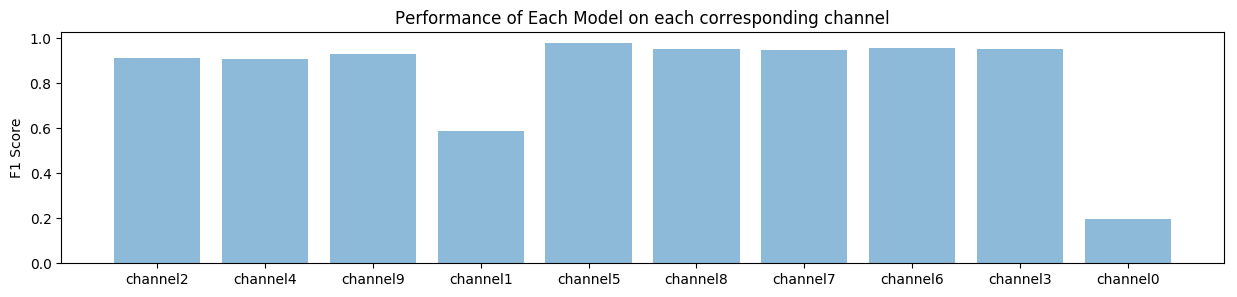

In [69]:
### Visualizations
objects = tuple(model_list)
y_pos = np.arange(len(objects))
performance = f1

plt.figure(figsize=(15,3))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 Score')
plt.title('Performance of Each Model on each corresponding channel')

plt.show()

In [76]:
for index in range(len(model_list)):
    
    print("Confusion Matrix for  ", model_list[index])
    model = model_dict[model_list[index]]
    opt = tf.keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    pred = model.predict(chan_dict[model_list[index]])
    print("The Confusion Matrix")
    confuse = tf.math.confusion_matrix(np.argmax(ytest,axis = 1), np.argmax(pred, axis = 1), num_classes = 10)
    print(confuse)
    print()
    print()

Confusion Matrix for   channel2
The Confusion Matrix
tf.Tensor(
[[22  0  0  0  1  1  0  0  1  1]
 [ 0 24  0  0  1  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  1  0  0]
 [ 0  0  1 21  0  1  0  0  0  0]
 [ 0  0  2  0 21  0  0  0  1  1]
 [ 0  0  1  1  0 17  3  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0]
 [ 0  0  1  1  0  0  0 24  0  2]
 [ 0  0  0  0  0  1  0  0 19  0]
 [ 0  0  0  0  0  0  0  0  0 19]], shape=(10, 10), dtype=int32)


Confusion Matrix for   channel4
The Confusion Matrix
tf.Tensor(
[[20  0  0  0  2  4  0  0  0  0]
 [ 0 22  0  0  3  0  0  0  0  0]
 [ 0  0 23  1  0  0  0  0  0  0]
 [ 0  0  0 22  0  1  0  0  0  0]
 [ 0  0  0  0 24  1  0  0  0  0]
 [ 0  0  0  1  0 18  3  0  0  0]
 [ 0  0  0  0  0  2 22  0  0  0]
 [ 0  0  0  1  0  0  0 27  0  0]
 [ 0  0  0  0  0  1  0  0 19  0]
 [ 0  0  0  0  1  0  0  3  0 15]], shape=(10, 10), dtype=int32)


Confusion Matrix for   channel9
The Confusion Matrix
tf.Tensor(
[[25  0  0  0  0  0  0  0  1  0]
 [ 0 25  0  0  0  0  0  0  0  0]
 [ 0  0 23  1  0

In [80]:
### Ensemble prediction
import scipy
from sklearn.metrics import accuracy_score
ensem_pred = [] ### Initialize lists
for index in range(10):
    model = model_dict[model_list[index]]### get model from dictionary
    opt = tf.keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    prede = model.predict(chan_dict[model_list[index]])### predict based on model
    ensem_pred.append(np.argmax(prede, axis = 1))
ensem_pred = np.array(ensem_pred)
ensem_pred = scipy.stats.mode(ensem_pred)[0]

In [88]:
ensemble_accuracy = accuracy_score(np.argmax(ytest, axis = 1),
                                   scipy.stats.mode(ensem_pred)[0].T)
print("The Accuracy is ", ensemble_accuracy)

In [ ]:
print("The Confusion Matrix")
confuse = tf.math.confusion_matrix(np.argmax(ytest,axis = 1), 
                                   ensem_pred, 
                                   num_classes = 10
                                  )
    